<a href="https://colab.research.google.com/github/RiniPaul86/Assignment_Randomforest/blob/main/RandomForest_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Credit score classification using Random Forest{Rini Paul}

####Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

####Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [1]:
# importing libraries
from pandas import read_csv
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,cross_val_score

from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# to manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the datasets
df = pd.read_csv("/content/credit_score.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.ndim

2

In [5]:
df.size

189616

In [6]:
df.shape

(6772, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        6772 non-null   object 
 1   Customer_ID               6772 non-null   object 
 2   Month                     6772 non-null   object 
 3   Name                      6121 non-null   object 
 4   Age                       6772 non-null   object 
 5   SSN                       6772 non-null   object 
 6   Occupation                6772 non-null   object 
 7   Annual_Income             6772 non-null   object 
 8   Monthly_Inhand_Salary     5772 non-null   float64
 9   Num_Bank_Accounts         6771 non-null   float64
 10  Num_Credit_Card           6771 non-null   float64
 11  Interest_Rate             6771 non-null   float64
 12  Num_of_Loan               6771 non-null   object 
 13  Type_of_Loan              5931 non-null   object 
 14  Delay_fr

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6767    False
6768    False
6769    False
6770    False
6771    False
Length: 6772, dtype: bool

In [9]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                         651
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1000
Num_Bank_Accounts              1
Num_Credit_Card                1
Interest_Rate                  1
Num_of_Loan                    1
Type_of_Loan                 841
Delay_from_due_date            1
Num_of_Delayed_Payment       476
Changed_Credit_Limit           1
Num_Credit_Inquiries         150
Credit_Mix                     1
Outstanding_Debt               1
Credit_Utilization_Ratio       1
Credit_History_Age           629
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly      291
Payment_Behaviour              1
Monthly_Balance               94
Credit_Score                   1
dtype: int64

In [10]:
#ID,SSN,Name, CustomerID will not contribute to the credit score
df = df.drop(['ID', 'SSN', 'Name', 'Customer_ID'], axis = 1)

In [11]:
#Occupation, TypeofLoan need to be dropped owing to the number of missing values
df = df.drop(['Type_of_Loan', 'Occupation','Month'], axis = 1)

In [12]:
#lets remove the rows that have null values
df = df.dropna()

In [ ]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,7,11.27,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,8_,11.27,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,34847.84,3037.986667,2.0,4.0,6.0,1,3.0,4,5.42,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,34847.84,3037.986667,2.0,4.0,6.0,1,7.0,1,7.42,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28,34847.84_,3037.986667,2.0,1385.0,6.0,1,3.0,-1,5.42,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [ ]:
df.isnull().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
def getMonths(duration):
    years, months = int(duration.split()[0]), int(duration.split()[3])
    months += years * 12
    return months

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(getMonths)
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,7,11.27,...,_,809.98,26.822620,265,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,8_,11.27,...,Good,809.98,22.537593,271,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,34847.84,3037.986667,2.0,4.0,6.0,1,3.0,4,5.42,...,Good,605.03,24.464031,319,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,34847.84,3037.986667,2.0,4.0,6.0,1,7.0,1,7.42,...,Good,605.03,38.550848,320,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28,34847.84_,3037.986667,2.0,1385.0,6.0,1,3.0,-1,5.42,...,_,605.03,33.224951,321,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [ ]:
# use label encoder to convert categorical data
label_encoder = preprocessing.LabelEncoder()
df['Credit_Mix'] = label_encoder.fit_transform(df['Credit_Mix'])
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour'] = label_encoder.fit_transform(df['Payment_Behaviour'])
df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,4501.0,4222.657755,3162.814946,355.208333,1684.108333,3132.524167,5933.786667,14710.533333
Num_Bank_Accounts,4501.0,17.139525,118.603562,0.000000,3.000000,6.000000,8.000000,1777.000000
Num_Credit_Card,4501.0,24.306599,139.042077,0.000000,4.000000,5.000000,7.000000,1480.000000
Interest_Rate,4501.0,72.433015,455.882538,1.000000,7.000000,13.000000,20.000000,5721.000000
Delay_from_due_date,4501.0,21.364586,14.871156,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,4501.0,19.403244,144.357931,0.000000,3.000000,5.000000,9.000000,2592.000000
Credit_Mix,4501.0,1.562319,1.014316,0.000000,1.000000,2.000000,2.000000,3.000000
Credit_Utilization_Ratio,4501.0,32.389388,5.146890,21.434746,28.071292,32.454897,36.658707,47.969560
Credit_History_Age,4501.0,225.871806,97.829744,1.000000,155.000000,222.000000,307.000000,404.000000
Payment_of_Min_Amount,4501.0,1.388802,0.694358,0.000000,1.000000,2.000000,2.000000,2.000000


<ipython-input-21-5ae48b7f97bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

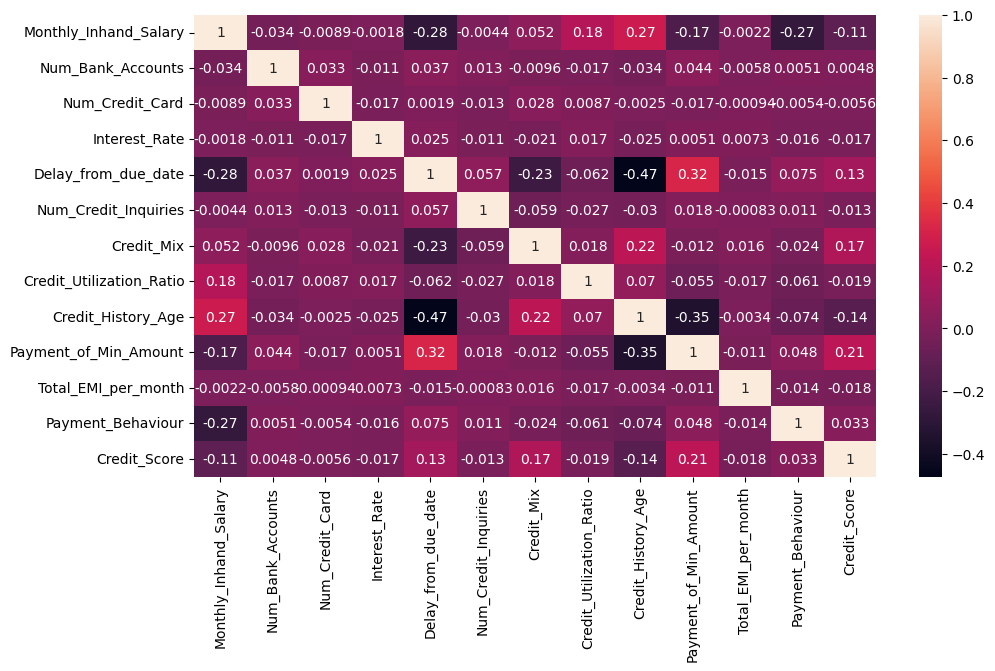

In [ ]:
plt.figure(figsize=(11,6))
sns.heatmap(df.corr(),annot=True)
plt.show

In [ ]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# dividing the dataset in X and Y

In [ ]:
array  = df.values

In [ ]:
x = array[:,0:20]
y = array[:,20]

In [ ]:
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

#build the model

model = BaggingClassifier(estimator=cart, n_estimators = num_trees)
results = cross_val_score(model,x,y,cv=kfold)

print(results.mean())

ValueError: ignored

In [ ]:
results

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,3,809.98,26.822620,265,1,49.574949,80.41529543900253,3,312.494089,0
6,23,19114.12,1824.843333,3,4,3,4,3,8_,11.27,...,1,809.98,22.537593,271,1,49.574949,178.3440674122349,6,244.565317,0
8,28_,34847.84,3037.986667,2,4,6,1,3,4,5.42,...,1,605.03,24.464031,319,1,18.816215,104.291825168246,6,470.690627,2
9,28,34847.84,3037.986667,2,4,6,1,7,1,7.42,...,1,605.03,38.550848,320,1,18.816215,40.39123782853101,1,484.591214,0
10,28,34847.84_,3037.986667,2,1385,6,1,3,-1,5.42,...,3,605.03,33.224951,321,1,18.816215,58.51597569589465,1,466.466476,2


In [ ]:
X = df.iloc[:,0:20]
Y = df.iloc[:,20]

In [ ]:
X

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,7,11.27,4.0,3,809.98,26.822620,265,1,49.574949,80.41529543900253,3,312.49408867943663
6,23,19114.12,1824.843333,3.0,4.0,3.0,4,3.0,8_,11.27,4.0,1,809.98,22.537593,271,1,49.574949,178.3440674122349,6,244.5653167062043
8,28_,34847.84,3037.986667,2.0,4.0,6.0,1,3.0,4,5.42,2.0,1,605.03,24.464031,319,1,18.816215,104.291825168246,6,470.69062692529184
9,28,34847.84,3037.986667,2.0,4.0,6.0,1,7.0,1,7.42,2.0,1,605.03,38.550848,320,1,18.816215,40.39123782853101,1,484.5912142650067
10,28,34847.84_,3037.986667,2.0,1385.0,6.0,1,3.0,-1,5.42,2.0,3,605.03,33.224951,321,1,18.816215,58.51597569589465,1,466.46647639764313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,55,44034.82,3568.568333,2.0,5.0,10.0,3,0.0,12,9.33,3.0,1,670.05,28.996865,392,1,97.758071,60.35477152306478,2,448.7439908749751
6767,55,15048753.0,3568.568333,2.0,5.0,10.0,3,0.0,12,9.33,3.0,1,670.05,28.429395,393,1,97.758071,374.4985507004525,0,174.60021169758735
6768,36,34425.62,2750.801667,7.0,6.0,18.0,3,21.0,18,9.99,1.0,2,29.9,30.362025,250,1,56.789642,118.7903268915228,6,389.50019793448763
6769,36,34425.62,2750.801667,7.0,6.0,18.0,3,26.0,17,9.99,1.0,2,29.9,32.349545,251,0,56.789642,75.95803092416901,2,392.33249390184136


In [ ]:
Y

0       0
6       0
8       2
9       0
10      2
       ..
6766    0
6767    0
6768    2
6769    2
6770    2
Name: Credit_Score, Length: 4501, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
print(X.shape)

(4501, 20)


In [ ]:
print(y_train.shape)

(3150,)


In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,max_features = 3))
sel.fit(X_train,y_train)

ValueError: ignored

In [ ]:
sel.get_support()

NameError: ignored

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

NameError: ignored

In [ ]:
print(selected_feat)

NameError: ignored